In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

In [ ]:
#loading datset into python environment

In [3]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#shape
data.shape
    

(891, 12)

In [5]:
#columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#checking null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#filling the column "age" with median
data["Age"]=data["Age"].fillna(data["Age"].median())
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
#filling missing values of column "Embarked" with mode value
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
#filling missing values of column "cabin" with mode value
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
#handling outliers

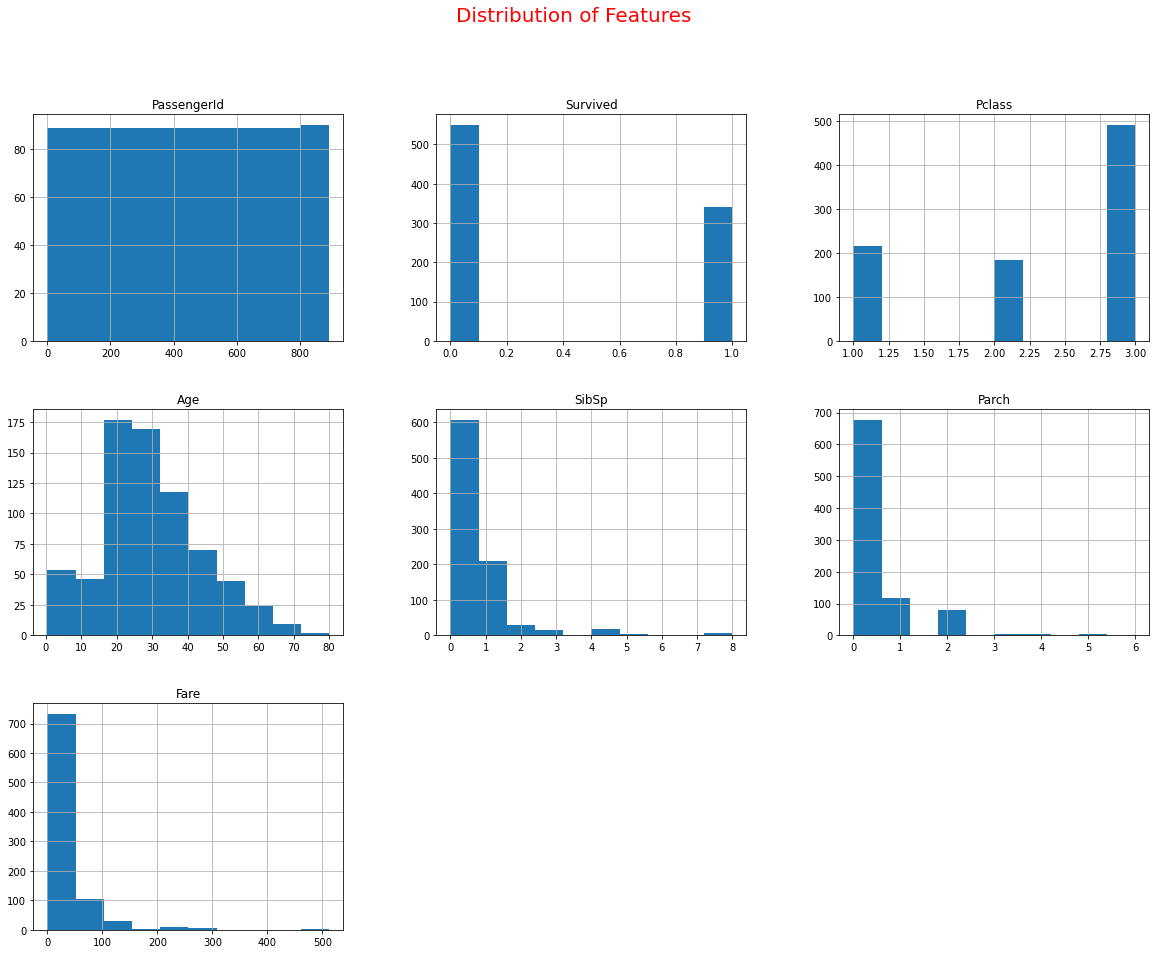

In [10]:
# distribution

num_fea = data.select_dtypes(exclude='object')
num_fea.hist(figsize=(20,15))
plt.suptitle('Distribution of Features', color='red', fontsize=20)
plt.show()

Most of the features are not normally distributed, instead they are skewed which shows that there might be outliers in the features.

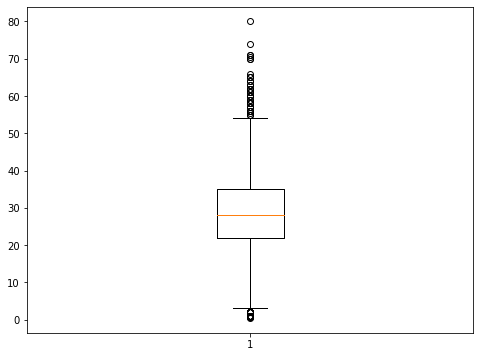

In [14]:
plt.figure(figsize=(8,6))
plt.boxplot(data["Age"])
plt.show()

In [15]:
Q1=np.percentile(data["Age"] , 25 , interpolation="midpoint")
Q2=np.percentile(data["Age"] , 50 , interpolation="midpoint")
Q3=np.percentile(data["Age"] , 75 , interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print("Q1=" ,Q1,'\n'
    "Q2=" ,Q2 ,'\n'
     "Q3=" ,Q3)
print("IQR=",IQR)
print("Lower limit=" ,low_lim,'\n'
     "Upper limit=" ,up_lim)

Q1= 22.0 
Q2= 28.0 
Q3= 35.0
IQR= 13.0
Lower limit= 2.5 
Upper limit= 54.5


In [17]:
outlier=[]
for x in data["Age"]:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [18]:
ind1=data.index[(data["Age"]<low_lim) | (data["Age"]>up_lim)]
data.loc[ind1].index

Int64Index([  7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164,
            170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305,
            326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492,
            493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659,
            672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851,
            879],
           dtype='int64')

In [19]:
data.drop([  7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164,
            170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305,
            326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492,
            493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659,
            672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851,
            879] , inplace=True)

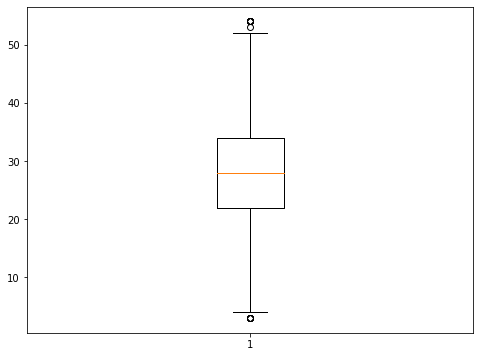

In [20]:
plt.figure(figsize=(8,6))
plt.boxplot(data["Age"])
plt.show()

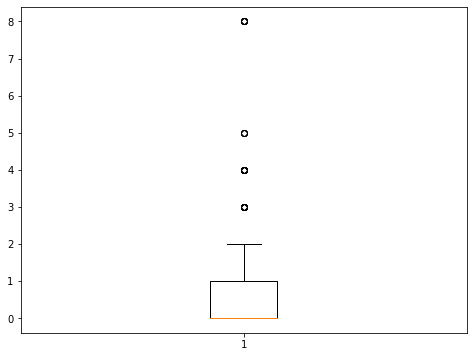

In [21]:
plt.figure(figsize=(8,6))
plt.boxplot(data["SibSp"])
plt.show()

In [22]:
Q1=np.percentile(data["SibSp"] , 25 , interpolation="midpoint")
Q2=np.percentile(data["SibSp"] , 50 , interpolation="midpoint")
Q3=np.percentile(data["SibSp"] , 75 , interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print("Q1=" ,Q1,'\n'
    "Q2=" ,Q2 ,'\n'
     "Q3=" ,Q3)
print("IQR=",IQR)
print("Lower limit=" ,low_lim,'\n'
     "Upper limit=" ,up_lim)

Q1= 0.0 
Q2= 0.0 
Q3= 1.0
IQR= 1.0
Lower limit= -1.5 
Upper limit= 2.5


In [23]:
index=data['SibSp'][(data['SibSp']>up_lim)|(data['SibSp']<low_lim)].index
data.drop(index,inplace=True)

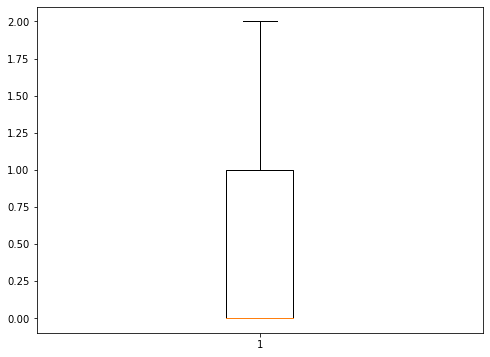

In [24]:
plt.figure(figsize=(8,6))
plt.boxplot(data["SibSp"])
plt.show()

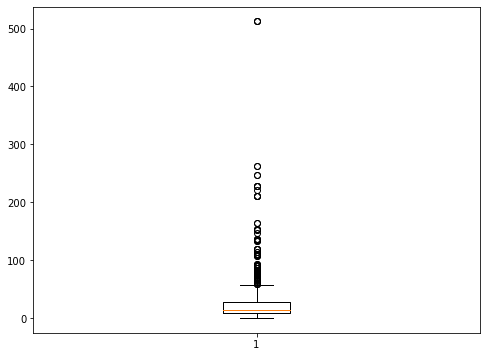

In [25]:
plt.figure(figsize=(8,6))
plt.boxplot(data["Fare"])
plt.show()

In [26]:
Q1=np.percentile(data["Fare"] , 25 , interpolation="midpoint")
Q2=np.percentile(data["Fare"] , 50 , interpolation="midpoint")
Q3=np.percentile(data["Fare"] , 75 , interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print("Q1=" ,Q1,'\n'
    "Q2=" ,Q2 ,'\n'
     "Q3=" ,Q3)
print("IQR=",IQR)
print("Lower limit=" ,low_lim,'\n'
     "Upper limit=" ,up_lim)

Q1= 7.8958 
Q2= 13.0 
Q3= 27.75
IQR= 19.8542
Lower limit= -21.885499999999997 
Upper limit= 57.5313


In [27]:
data['Fare']=np.where(data['Fare']>up_lim,up_lim,np.where(data['Fare']<low_lim,low_lim,data['Fare']))

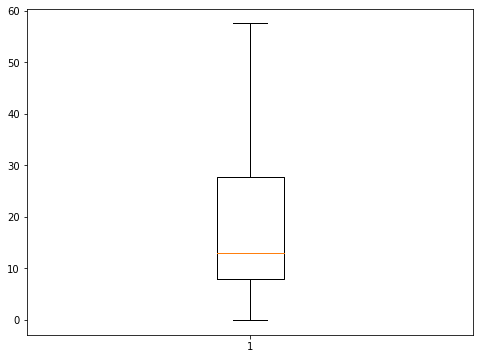

In [28]:
plt.figure(figsize=(8,6))
plt.boxplot(data["Fare"])
plt.show()

C:\Users\Lavanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


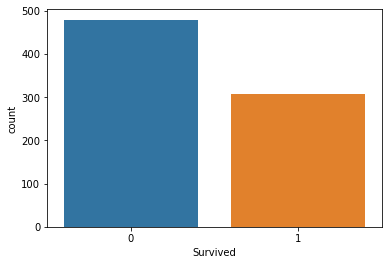

In [29]:
sns.countplot(data['Survived'])
plt.show()

C:\Users\Lavanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


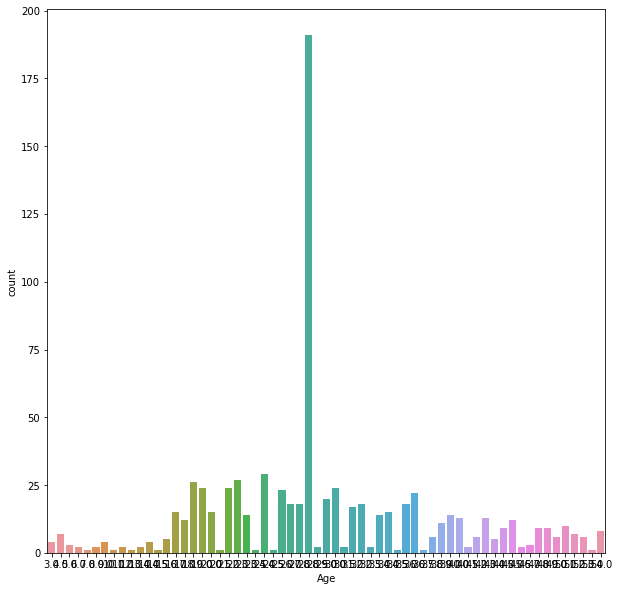

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(data["Age"])
plt.show()

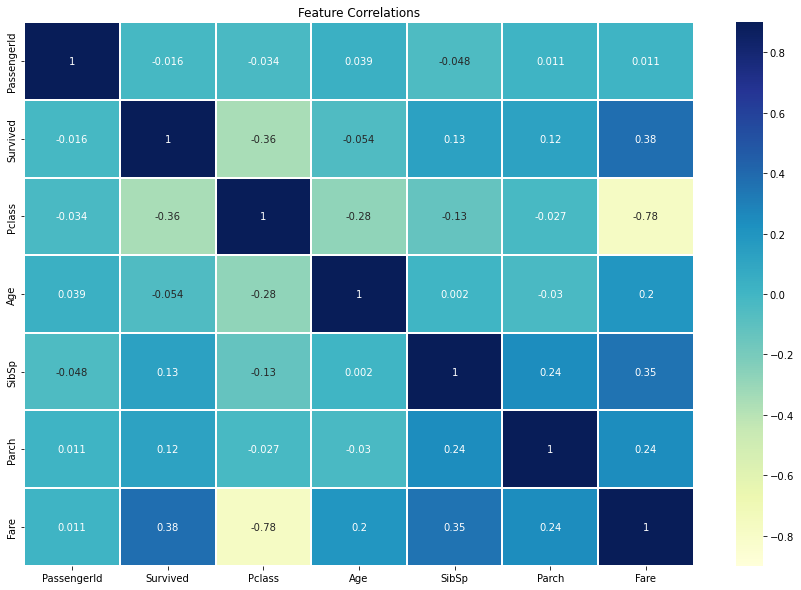

In [31]:
# correlation of features

plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr(), vmin=-0.9, vmax=0.9, annot=True, linewidth=0.2, cmap='YlGnBu')
plt.title('Feature Correlations')
plt.show()

In [32]:
#label encoding
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
data['Sex'] = ln.fit_transform(data['Sex']) 

In [33]:
data=pd.get_dummies(data)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,38.0,1,0,57.5313,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,0,19.0,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,0,28.0,1,2,23.4500,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,1,26.0,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
y=data['Survived']
x=data.drop('Survived',axis=1)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_test=scaler.fit_transform(x_test)
x_train=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test) 

In [37]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [38]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.44936708860759494

In [40]:
#hyperparameter tuning

In [46]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
                    ('pca', PCA()),
                    ('estimator', GaussianNB()),
                    ])
    
parameters = {'estimator__var_smoothing': [1e-11, 1e-10, 1e-9]}
Bayes = GridSearchCV(pipe, parameters, scoring='accuracy', cv=10).fit(x_train, y_train)
print(Bayes.best_estimator_)
print('best score:')
print(Bayes.best_score_)
predictions = Bayes.best_estimator_.predict(x_test)

Pipeline(steps=[('pca', PCA()), ('estimator', GaussianNB(var_smoothing=1e-11))])
best score:
0.3885304659498208


In [47]:
print(predictions)

[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
